# Data Manipulation with pandas
# 1Transforming DataFRames

**pandas** is built on top of two essential Python packages, **NumPy and Matplotlib**. Numpy provides multidimensional array objects for easy data manipulation that pandas uses to store data, and Matplotlib has powerful data visualization capabilities that pandas takes advantage of.

In [1]:
import pandas as pd
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
#pd.DataFrame({'string_x': string_x}, index = [0])       ##TRIED TO INCREASE THE DISPLAY. DIDNT WORK

#from IPython.display import display, HTML
#display(HTML("<style>div.output_scroll { height: 44em; }</style>"))


My_Df={'Name':['DataFrame: .head()',' DataFrame: .info()','DataFrame: .shape','DataFrame: .describe()','DataFrame: .values','DataFrame: .columns','.index'],'Description':['returns the first few rows of the DataFrame','The info method displays the names of columns, the data types they contain, and whether they have any missing values.',"A DataFrame's shape attribute contains a tuple that holds the number of rows followed by the number of columns. Since this is an attribute instead of a method, you write it without parentheses.",'The describe method computes some summary statistics for numerical columns, like mean and median. "count" is the number of non-missing values in each column. describe is good for a quick overview of numeric variables, ','DataFrames consist of three different components, accessible using attributes. The values attribute, as you might expect, contains the data values in a 2-dimensional NumPy array.','The other two components of a DataFrame are labels for columns and rows. The columns attribute contains column names,','the index attribute contains row numbers or row names. Be careful, since row labels are stored in dot-index, not in dot-rows. Notice that these are Index objects']}
print(pd.DataFrame(My_Df))

                     Name                                        Description
0      DataFrame: .head()        returns the first few rows of the DataFrame
1      DataFrame: .info()  The info method displays the names of columns,...
2       DataFrame: .shape  A DataFrame's shape attribute contains a tuple...
3  DataFrame: .describe()  The describe method computes some summary stat...
4      DataFrame: .values  DataFrames consist of three different componen...
5     DataFrame: .columns  The other two components of a DataFrame are la...
6                  .index  the index attribute contains row numbers or ro...


To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

**.values:** A two-dimensional NumPy array of values.
**.columns:** An index of columns: the column names.
**.index:** An index for the rows: either row numbers or row names.
You can usually think of indexes as a list of strings or numbers, though the pandas Index data type allows for more sophisticated options

### Sorting rows
Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to            .sort_values()

#select 2 variable/column

In [ ]:
#Sort homelessness by descending family members
homelessness_fam =homelessness.sort_values('family_members',ascending=False)

homelessness_reg_fam =homelessness.sort_values(['region','family_members'],ascending=[True,False])


### Subsetting COLUMNS

In [ ]:
ind_state = homelessness[['individuals','state']]   #2nd [is for subsetting]

# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals']>10000]

# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region']=='Mountain']


# Filter for rows where family_members is less than 1000  and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members']<1000) &(homelessness['region']=='Pacific')]


 notice the ( to separate the command)
 ### Subsetting ROWS
 Subsetting rows by categorical variables

In [ ]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic =homelessness[(homelessness['region']=='South Atlantic') | (homelessness['region']=='Mid-Atlantic')]

In [ ]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness =homelessness[homelessness['state'].isin(canu)]

**.isin** to check

## Adding new columns

In [ ]:
# Add total col as sum of individuals and family_members
homelessness['total']=homelessness['individuals']+homelessness['family_members']

# Add p_individuals col as proportion of total that are individuals
homelessness['p_individuals']=(homelessness['individuals']/homelessness['total'])

# lef han side is the name of the column and right hand side is the equation


### All combo
You've seen the four most common types of data manipulation: sorting rows, subsetting columns, subsetting rows, and adding new columns. In a real-life data analysis, you can mix and match these four manipulations to answer a multitude of questions.

In this exercise, you'll answer the question, "Which state has the highest number of homeless individuals per 10,000 people in the state?" Combine your new pandas skills to find out.

In [ ]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"] 

# Subset rows for indiv_per_10k greater than 20
high_homelessness =homelessness[homelessness["indiv_per_10k"]>20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k',ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state','indiv_per_10k']]

# See the result
print(result)

# 2 Aggregating DataFrames(NV)
## 2.1 Summary Stat
### Mean and median

In [ ]:
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales column
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

### Efficient summaries/.agg method
The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. For example,

df['column'].agg(function)

In [ ]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", 'fuel_price_usd_per_l', 'unemployment']].agg(iqr))


##WE CAN ALSO USE TWO FUNC

print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr,np.median]))

### Summarizing numerical data
mean()
49.714285714285715
.median() , .mode()
.min() , .max()
.var() , .std()
.sum()
.quantile()
### Cumulative statistics
.cumsum()
.cummax()
.cummin()
.cumprod()

In [ ]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date',ascending=True)
#print(sales_1_1)
# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()
#print(sales_1_1)
# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales']=sales_1_1['weekly_sales'].cummax()
print(sales_1_1)
# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

## 2.2 Counting
### Dropping duplicates
Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times.

In [ ]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store','type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store','department'])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset='date')   ####important

# Print date col of holiday_dates
print(holiday_dates['date'])

### Counting categorical variables
Count the number of stores of each store type in store_types.
Count the proportion of stores of each store type in store_types.
Count the number of different departments in store_depts, sorting the counts in descending order.
Count the proportion of different departments in store_depts, sorting the proportions in descending order.








In [ ]:
# Count the number of stores of each type
store_counts =store_types['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

## 2.3Grouped summary statistics
we can group different columns and see their various statistics result.


In [ ]:
dogs[dogs["color"] == "Black"]["weight_kg"].mean()
dogs[dogs["color"] == "Brown"]["weight_kg"].mean()
dogs[dogs["color"] == "White"]["weight_kg"].mean()
dogs[dogs["color"] == "Gray"]["weight_kg"].mean()
dogs[dogs["color"] == "Tan"]["weight_kg"].mean()

###This 5 lines of code can be writtn in one line

dogs.groupby("color")["weight_kg"].mean()

##
dogs.groupby("color")["weight_kg"].agg([min, max, sum])
dogs.groupby(["color", "breed"])["weight_kg"].mean()
dogs.groupby(["color", "breed"])[["weight_kg", "height_cm"]].mean()

What percent of sales occurred at each store type?
While .groupby() is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: "supercenters," "discount stores," and "neighborhood markets," encoded in this dataset as type "A," "B," and "C." In this exercise, you'll calculate the total sales made at each store type, without using .groupby(). You can then use these numbers to see what proportion of Walmart's total sales were made at each type.

In [ ]:
sales_all = sales["weekly_sales"].sum()
print(sales_all)
# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales['type']=='B']["weekly_sales"].sum()
# Subset for type C stores, calc total weekly sales
sales_C = sales[sales['type']=='C']["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all           #####
print(sales_propn_by_type)


sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales


sales_by_type_is_holiday=sales.groupby(['type','is_holiday'])['weekly_sales'].sum()


print(sales_by_type_is_holiday)

### Multiple grouped summaries
Earlier in this chapter, you saw that the .agg() method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including: np.min, np.max, np.mean, and np.median.

In [ ]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([min,max,np.mean,np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment','fuel_price_usd_per_l']].agg([min,max,np.mean,np.median])  ##np.mean and np.median
                                 ##type is in (). if we want more than one variable then ([]) ....and be careful about the [[]] . a [] will not give a list
# Print unemp_fuel_stats
print(unemp_fuel_stats)

In [ ]:
unemp_fuel_stats = sales.groupby('type')[['unemployment','fuel_price_usd_per_l']].agg([min,max,np.mean,np.median])
##Read like this. we group sales by type and calculate the agg(...) of unemployment and fuel price

## 2.4 Pivot Table(imp)
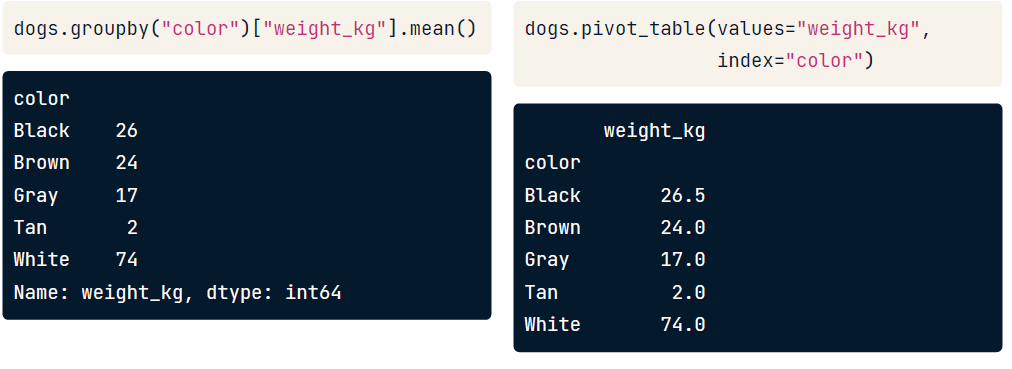

we grouped the dogs by color and calculated their mean weights. We can do the same thing using the pivot_table method. The "values" argument is the column that you want to summarize, and the index column is the column that you want to group by. By default, pivot_table takes the mean value for each group. Now its not just mean()

In [ ]:
dogs.pivot_table(values="weight_kg", index="color", aggfunc=np.median)
dogs.pivot_table(values="weight_kg", index="color", aggfunc=[np.mean, np.median])


                                    **########Pivot on two variables####****
dogs.groupby(["color", "breed"])["weight_kg"].mean() ###normal groupby method
dogs.pivot_table(values="weight_kg", index="color", columns="breed")   ####e can pass a second variable name into the columns argument


In pivot table if there is no value, then i gives NAN. we can chqange it to ZEROOOO BY USING fill_value=0

In [ ]:
dogs.pivot_table(values="weight_kg", index="color", columns="breed", fill_value=0)
dogs.pivot_table(values="weight_kg", index="color", columns="breed",fill_value=0, margins=True)
#####If we set the margins argument to True, the last row and last column of the pivot table contain 
#the mean of all the values in the column or row, not including the missing values that were filled in with Os.

# Print the mean weekly_sales by department and type; fill missing values with 0s;%%%%%% sum all rows and cols%%%%%
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0,margins=True))

# 3Slicing and Indexing DataFrames
## 3.1 EXPLICIT INDEX
You can move a column from the body of the DataFrame to the index. This is called "setting an index," and it uses the set_index method.

In [ ]:
dogs_ind = dogs.set_index("name") 

dogs_ind.reset_index()  ## to reset the change index////undo it

dogs_ind.reset_index(drop=True)
####reset_index has a drop argument that allows you to discard an index. Here, setting drop to True entirely removes the 'names'


we need indexing for better understanding or simplicity. if we want to know the name of specific dogs then we need the code---dogs[dogs["name"].isin(["Bella", "Stella"])]
or we can use a .loc method

In [ ]:
dogs_ind.loc[["Bella", "Stella"]]


### Multi-level indexes a.k.a. hierarchical indexes
 include multiple columns in the index by passing a list of column. inner level and outer level. in below code, color is inned level that is nested on outer level breed


In [ ]:
dogs_ind3 = dogs.set_index(["breed", "color"])


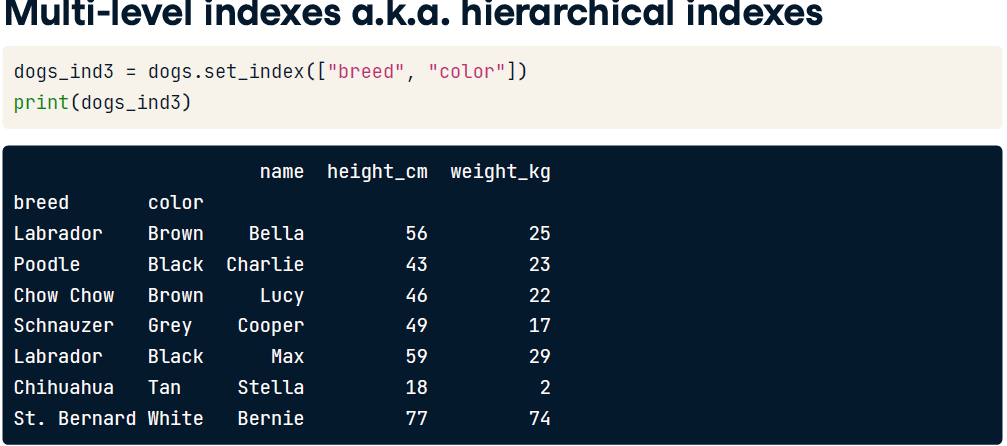

In [ ]:
#for outer level

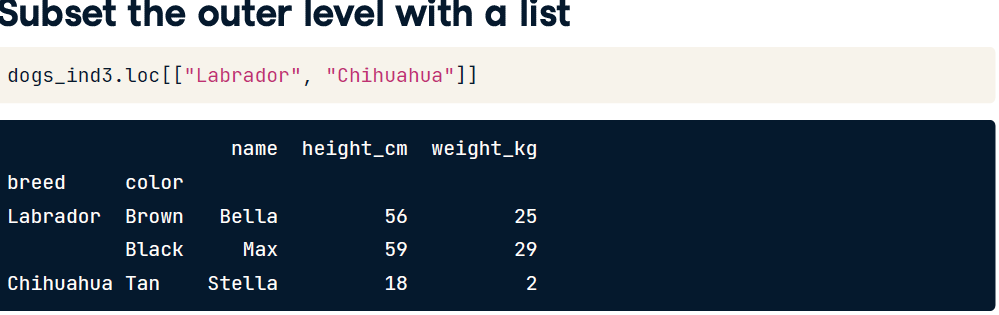

for inner level wid list of tuple



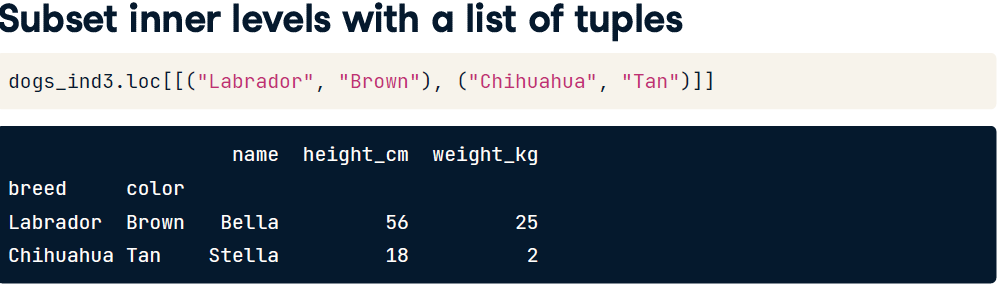

### Sorting by index values
dogs_ind3.sort_index()   

In [ ]:
dogs_ind3.sort_index()   
#By default, it sorts all index levels from outer to inner, in ascending order.



##for controlling the sort
dogs_ind3.sort_index(level=["color", "breed"], ascending=[True, False])

In [ ]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]
print(cities)
# Subset temperatures using square brackets
print(temperatures[temperatures['city'].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

In [ ]:
######## Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country','city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [('Brazil','Rio De Janeiro'),('Pakistan','Lahore')]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

In [ ]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level=['city']) )

# Sort temperatures_ind by ascending country then descending city
print(temperatures_ind.sort_index(level=['country','city'], ascending=[True, False]) )

## 3.2 Slicing and subsetting with .loc and .iloc

slicing in dataframe is not as list. 

*****SEE PDF CHAPTER 3*****
Slicing index values
Slicing lets you select consecutive elements of an object using first:last syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the .loc[] method.

Compared to slicing lists, there are a few things to remember.

You can only slice an index if the index is sorted (using .sort_index()).
To slice at the outer level, first and last can be strings.
To slice at inner levels, first and last should be tuples.
If you pass a single slice to .loc[], it will slice the rows.

##  3.3 Working with pivot tables
### Pivot temperature by city and year
It's interesting to see how temperatures for each city change over time—looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

You can access the components of a date (year, month and day) using code of the form 
dataframe["column"].dt.component.
the month component is dataframe["column"].dt.month, 
and the year component is dataframe["column"].dt.year.

Once you have the year column, you can create a pivot table with the data aggregated by city and year

In [ ]:
# Add a year column to temperatures
temperatures['year']=temperatures['date'].dt.year
print(temperatures)

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table('avg_temp_c', index=['country','city'], columns='year')

# See the result
print(temp_by_country_city_vs_year)





### Subsetting pivot tables

In [ ]:
print(temp_by_country_city_vs_year)

# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt':'India']

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi')]

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi'),2005:2010]

#### Calculating on a pivot table
Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often you'll need to perform further calculations on them. A common thing to do is to find the rows or columns where the highest or lowest value occurs.

In [ ]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])          ####PRACTICE AGAIN####

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

# 4 Creating and Visualizing DataFrames
## 4.1 Visualizing your data

SEE CHAPTER 4
we will work with avocado data


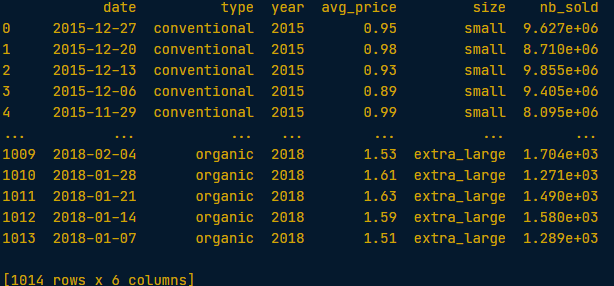

### Which avocado size is most popular?

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
#print(avocados)
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()      ##grouped by size and different size er sell janar jonno
print(nb_sold_by_size)
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

### Changes in sales over time
kon date e kotutuku sale hochhe 

In [ ]:
print(avocados)

# Get the total number of avocados sold on each date
#avocados['number_of_avocados_sold']=avocados['nb_sold']/avocados['avg_price']
print(avocados)
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date

nb_sold_by_date.plot(kind='line')
# Show the plot
plt.show()

### Avocado supply and demand

df.plot()  ei ()e shb kichu define kora jay plot er. Thats really amazing

In [ ]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x='nb_sold',y='avg_price', kind='scatter',title='Number of avocados sold vs. average price')
##plt.title("Number of avocados sold vs. average price")

# Show the plot
plt.show()

### Price of conventional vs. organic avocados
in type there are two types-conventional and organic. 
dataframe eplot use kora aro easy. 

In [1]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5,bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5,bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

NameError: name 'avocados' is not defined

### Missing values
1st step: check if there in NaN **df.isna()**
2nd step: so if there is NaN- how many??    **df.isna().any()**   then   **df.isna().sum().plot(kind="bar")** gives how many
3rd steP: (may be)delete the rows of missing value      **df.dropna()**   but not ideal as losses a lot of data
4th step: make NaN to zero   **df.fillna(0)**

In [3]:
avocados_list = {'date': ["2019-11-03","2019-11-10"], 'small_sold': [10376832,10717154], 'large_sold': [7835071,8561348]}
    

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

NameError: name 'pd' is not defined

### Reading and writing CSVs
new_dogs=pd.read_csv('new_dogs.csv')


if ywe want to create a csv file

In [ ]:
new_dogs.to_csv("new_dogs_with_bmi.csv")

In [ ]:
# From previous steps
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)





uporer code full dataframe dey nah. aro easy readable and full dataframe dey nicherta

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")